In [106]:
import torch
import torch.nn.functional as F
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### 1. 正向传播

In [107]:
x = torch.tensor([[0.2,0.5],[0.4,0.3]],dtype=torch.float)
print(x)
ones = torch.ones(2,1,dtype=torch.float)
print(ones)
x = torch.cat([x,ones],-1)  #加入bias 
print('x:', x,x.size())

y = torch.tensor([[1],[0]],dtype=torch.float)
print("y:", y,y.size())

w = torch.tensor([[0.1,1.3,1.4]],dtype=torch.float)
print('w:', w,w.size())

# 1. linear 线性计算
h = x.matmul(torch.t(w))
print(h)
h = torch.mm(x,torch.t(w))
print(h) 

# 2.sigmoid
pred_y = 1.0/(1+np.exp(-h))
print(pred_y)

pred_y = torch.sigmoid(h)  #等价 1.0/(1+np.exp(-h))
print(pred_y) 

tensor([[0.2000, 0.5000],
        [0.4000, 0.3000]])
tensor([[1.],
        [1.]])
x: tensor([[0.2000, 0.5000, 1.0000],
        [0.4000, 0.3000, 1.0000]]) torch.Size([2, 3])
y: tensor([[1.],
        [0.]]) torch.Size([2, 1])
w: tensor([[0.1000, 1.3000, 1.4000]]) torch.Size([1, 3])
tensor([[2.0700],
        [1.8300]])
tensor([[2.0700],
        [1.8300]])
tensor([[0.8880],
        [0.8618]])
tensor([[0.8880],
        [0.8618]])


In [108]:
# 3. 损失函数
# -(y*log(pred_y) + (1-y)*log(1-pred_y))

# numpy 实现
print("~~cost~~~")
print((y*np.log(pred_y)).numpy() )
print( ((1-y)*np.log((1-pred_y))).numpy() )
cost = -np.sum( (y*np.log(pred_y)).numpy() + ((1-y)*np.log((1-pred_y))).numpy()  )/y.size()[0]
print(cost)
cost = -np.mean( (y*np.log(pred_y)).numpy() + ((1-y)*np.log((1-pred_y))).numpy()  ) 
print(cost)

# torch 实现
print(torch.log(pred_y))
cost = -torch.sum( y*torch.log(pred_y) + (1-y)*torch.log(1-pred_y) ) / y.size()[0] #浮点精度？
print(cost)
cost = -torch.mean( y*torch.log(pred_y) + (1-y)*torch.log(1-pred_y) , 0 ) #0，默认值
print(cost)

# torch BCELoss函数, binary_cross_entropy
criterion = torch.nn.BCELoss() #reduction='elementwise_mean'
cost = criterion(pred_y,y)
print('BCELoss:',cost)

cost = F.binary_cross_entropy(pred_y,y)
print(cost)

~~cost~~~
[[-0.11883648]
 [-0.        ]]
[[-0.       ]
 [-1.9787762]]
1.0488063097000122
1.0488063
tensor([[-0.1188],
        [-0.1488]])
tensor(1.0488)
tensor([1.0488])
BCELoss: tensor(1.0488)
tensor(1.0488)


In [113]:
# 4. 损失函数求导
print(pred_y - y)
print(x)
ld = (pred_y - y)*x
print(ld)

w_x =torch.mean( ld ,0)
print(w_x)


tensor([[-0.1120],
        [ 0.8618]])
tensor([[0.2000, 0.5000, 1.0000],
        [0.4000, 0.3000, 1.0000]])
tensor([[-0.0224, -0.0560, -0.1120],
        [ 0.3447,  0.2585,  0.8618]])
tensor([0.1611, 0.1013, 0.3749])


### 1. 生成测试数据

tensor([[0.4361],
        [0.6389],
        [0.0820],
        [0.8849],
        [0.6268]]) tensor([[0.8699],
        [0.7310],
        [0.6344],
        [0.5519],
        [0.3759]])
tensor([[0.7725],
        [0.9550],
        [0.4538],
        [1.1764],
        [0.9441]]) tensor([[1.0229],
        [0.8979],
        [0.8109],
        [0.7367],
        [0.5783]])
tensor([[0.4361, 0.7725],
        [0.6389, 0.9550],
        [0.0820, 0.4538],
        [0.8849, 1.1764],
        [0.6268, 0.9441]]) tensor([[0.8699, 1.0229],
        [0.7310, 0.8979],
        [0.6344, 0.8109],
        [0.5519, 0.7367],
        [0.3759, 0.5783]])
tensor([[0.4361, 0.7725],
        [0.6389, 0.9550],
        [0.0820, 0.4538],
        [0.8849, 1.1764],
        [0.6268, 0.9441],
        [0.8699, 1.0229],
        [0.7310, 0.8979],
        [0.6344, 0.8109],
        [0.5519, 0.7367],
        [0.3759, 0.5783]])
tensor([[1.],
        [1.],
        [1.],
        [1.],
        [1.]])
tensor([[0.],
        [0.],
        [0.],


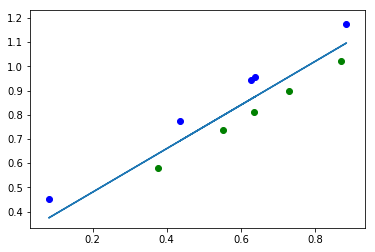

tensor([[1.0000, 0.4361, 0.7725],
        [1.0000, 0.6389, 0.9550],
        [1.0000, 0.0820, 0.4538],
        [1.0000, 0.8849, 1.1764],
        [1.0000, 0.6268, 0.9441],
        [0.0000, 0.8699, 1.0229],
        [0.0000, 0.7310, 0.8979],
        [0.0000, 0.6344, 0.8109],
        [0.0000, 0.5519, 0.7367],
        [0.0000, 0.3759, 0.5783]])


In [123]:
m = 5

x1 = torch.rand(m,1)
x2 = torch.rand(m,1)

print(x1,x2)

# y = ax + b
a = 0.9
b = 0.3

y0 = a*x1 + b
y1 = a*x1 + b + 0.08
y2 = a*x2 + b - 0.06
print(y1,y2)


features1 = torch.cat([x1,y1],-1)
features2 = torch.cat([x2,y2],-1)
print(features1,features2)

features = torch.cat([features1,features2],0)
print(features)

labels1 = torch.ones(m,1)
print(labels1)
labels2 = torch.zeros(m,1)
print(labels2)
labels = torch.cat([labels1,labels2],0)
print(labels)

#绘图？
plt.scatter(x1,y1,color='b') #正例
plt.scatter(x2,y2,color='g') #负例
plt.plot(x1.view(-1,1).numpy(),y0.view(-1,1).numpy()) #分割线
plt.show()

data = torch.cat([labels,features],-1)
print(data)

#随机打乱样本顺序 ？

#http://www.atyun.com/4250.html


### 3. 实现Logistic regression

In [142]:
w = torch.rand(2,1)
learning_rate = 0.1

# ones = torch.ones(features.size()[0],1,dtype=torch.float)
# print(ones)

features_x = torch.cat([features,ones],-1)
print(features_x)

w = torch.rand(1,features_x.size()[1])
print(w)

h = features_x.matmul(torch.t(w))
print(h)
pred_y = torch.sigmoid(h)
print(pred_y)
cost = F.binary_cross_entropy(pred_y,labels)
print(cost)

ld = (pred_y-labels)*features_x # torch.mean()
print(ld)
d = torch.mean(ld,0)
print(d)
w_d = w - learning_rate*d
print(w_d)

for i in range(0,50000):
    h = features_x.matmul(torch.t(w))
    pred_y = torch.sigmoid(h)
    
    cost = F.binary_cross_entropy(pred_y,labels)
    w = w - learning_rate * torch.mean( (pred_y-labels)*features_x, 0)
    
    if i%500 == 0:
        print(i, cost)  
        
print('w:', w)


tensor([[0.4361, 0.7725, 1.0000],
        [0.6389, 0.9550, 1.0000],
        [0.0820, 0.4538, 1.0000],
        [0.8849, 1.1764, 1.0000],
        [0.6268, 0.9441, 1.0000],
        [0.8699, 1.0229, 1.0000],
        [0.7310, 0.8979, 1.0000],
        [0.6344, 0.8109, 1.0000],
        [0.5519, 0.7367, 1.0000],
        [0.3759, 0.5783, 1.0000]])
tensor([[0.5585, 0.7841, 0.2521]])
tensor([[1.1014],
        [1.3577],
        [0.6536],
        [1.6687],
        [1.3425],
        [1.5399],
        [1.3644],
        [1.2422],
        [1.1380],
        [0.9155]])
tensor([[0.7505],
        [0.7954],
        [0.6578],
        [0.8414],
        [0.7929],
        [0.8235],
        [0.7965],
        [0.7760],
        [0.7573],
        [0.7141]])
tensor(0.8830)
tensor([[-0.1088, -0.1927, -0.2495],
        [-0.1307, -0.1954, -0.2046],
        [-0.0280, -0.1553, -0.3422],
        [-0.1403, -0.1866, -0.1586],
        [-0.1298, -0.1955, -0.2071],
        [ 0.7163,  0.8423,  0.8235],
        [ 0.5822,  0.7152